In [1]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
url = "https://www.snapdeal.com/products/mens-footwear-sports-shoes"
headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/120.0.0.0 Safari/537.36"
    ),
    "Accept-Language": "en-US,en;q=0.9",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
    "Connection": "keep-alive",
}

response = requests.get(url, headers=headers)
print(response.status_code)

soup = BeautifulSoup(response.text, "html.parser")
print(soup.head)

200
<head prefix="og: https://ogp.me/ns# fb: https://ogp.me/ns/fb# snapdeallog: https://ogp.me/ns/fb/snapdeallog#">
<link href="https://i1.sdlcdn.com" rel="dns-prefetch"/>
<link href="https://i2.sdlcdn.com" rel="dns-prefetch"/>
<link href="https://i3.sdlcdn.com" rel="dns-prefetch"/>
<link href="https://i4.sdlcdn.com" rel="dns-prefetch"/>
<link href="https://g.sdlcdn.com" rel="dns-prefetch"/>
<link href="https://sa.snapdeal.com" rel="dns-prefetch"/>
<link href="https://search-suggester.snapdeal.com" rel="dns-prefetch"/>
<link href="https://mobileapi.snapdeal.com" rel="dns-prefetch"/>
<link href="/manifest.json" rel="manifest"/>
<link as="script" crossorigin="anonymous" href="https://i1.sdlcdn.com/js/1743595968340/snap/base.jquery112.min.js" rel="preload"/>
<link href="https://i4.sdlcdn.com/css/1743595968340/snap/common/scss/base.min.css" rel="stylesheet" type="text/css">
<link href="https://www.snapdeal.com/opensearch.xml" rel="search" type="application/opensearchdescription+xml">
<link

In [10]:
products = soup.find_all("div", class_="product-tuple-listing")

data= []

for product in products:
    #product name 
    name = product.find("p",class_="product-title")
    name = name.text.strip() if name else None
    
    #Brand 
    brand = name.split()[0] if name else "Unknown"
    
    #Discounted price
    discounted_price = product.find("span", class_= 'product-price')
    discounted_price = discounted_price.text.strip() if discounted_price else None 
    
    #original price 
    original_price = product.find("span", class_='product-desc-price')
    original_price = original_price.text.strip() if original_price else None 
    
    #discounted percentage 
    discount = product.find("div", class_="product-discount")
    discount = discount.text.strip() if discount else None 
    
    #Rating 
    rating = product.find("span", class_="filled-stars")
    rating = rating.get("style") if rating else None 
    if rating:
        rating = re.findall(r"width:(\d+)%",rating)
        rating = round(int(rating[0])/20,1) if rating else None 
        
    #Number of Reviews 
    reviews = product.find("p", class_="product-rating-count")
    reviews= reviews.text.strip("()") if reviews else "0"
    
    data.append([
        name,
        brand,
        original_price,
        discounted_price,
        discount,
        rating,
        reviews
    ])

In [11]:
columns = [
    "Product Name",
    "Brand",
    "Original Price",
    "Discounted Price",
    "Discount Percentage",
    "Rating",
    "Number of Reviews"
]
df = pd.DataFrame(data,columns=columns)

df.to_csv("snapdeal_products.csv", index=False)

print("Data Saved to snapdeal_products.csv")

Data Saved to snapdeal_products.csv


In [16]:
df["Original Price"] = (
    df["Original Price"]
    .astype(str)
    .str.replace("Rs.", "", regex=False)
    .str.replace(",", "", regex=False)
)

df["Original Price"] = pd.to_numeric(df["Original Price"], errors="coerce")


df["Discounted Price"] = (
    df["Discounted Price"]
    .astype(str)
    .str.replace("Rs.", "", regex=False)
    .str.replace(",", "", regex=False)
)

df["Discounted Price"] = pd.to_numeric(df["Discounted Price"], errors="coerce")

#These lines remove currency symbols and commas from price columns and convert them into numeric values so calculations and graphs can be performed.

In [18]:
print(df["Original Price"].dtype)
print(df["Original Price"].head())

print(df["Discounted Price"].dtype)
print(df["Discounted Price"].head())


float64
0    1949.0
1    1999.0
2    1899.0
3    2249.0
4    2299.0
Name: Original Price, dtype: float64
float64
0    809.0
1    507.0
2    702.0
3    512.0
4    943.0
Name: Discounted Price, dtype: float64


In [19]:
top_brands = df["Brand"].value_counts().head(10)
print(top_brands)

Campus      7
ASIAN       5
Clymb       4
DUCKINS     1
hotstyle    1
OFF         1
Cult        1
Name: Brand, dtype: int64


In [21]:
df["Discount Percentage"]= df["Discount Percentage"].str.replace("% Off","").astype(float)
print(df["Discount Percentage"].describe())

count    20.000000
mean     62.350000
std      12.300086
min      33.000000
25%      56.750000
50%      63.500000
75%      71.250000
max      80.000000
Name: Discount Percentage, dtype: float64


In [22]:
df.columns

Index(['Product Name', 'Brand', 'Original Price', 'Discounted Price',
       'Discount Percentage', 'Rating', 'Number of Reviews'],
      dtype='object')

In [23]:
brand_counts = df["Brand"].value_counts().head(10)

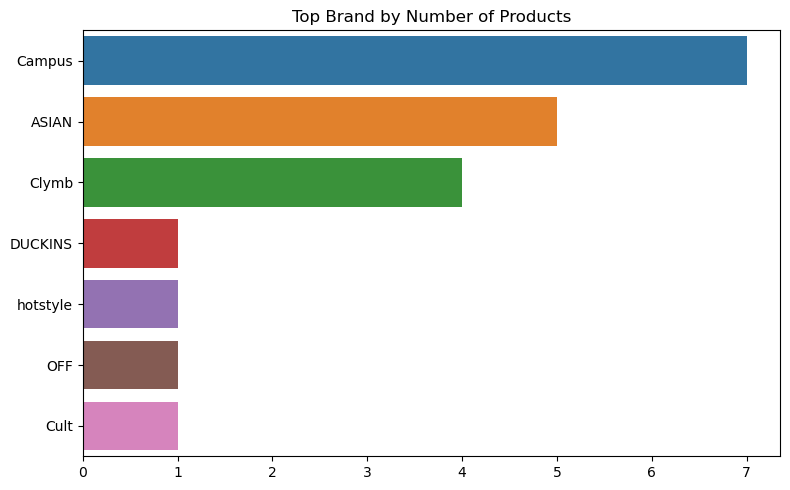

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x=brand_counts.values,y=brand_counts.index)
plt.title("Top Brand by Number of Products")
plt.xlabel=("Number of Products")
plt.ylabel=("Brands")
plt.tight_layout()
plt.show()

In [28]:
print(type(brand_counts))
print(brand_counts)

<class 'pandas.core.series.Series'>
Campus      7
ASIAN       5
Clymb       4
DUCKINS     1
hotstyle    1
OFF         1
Cult        1
Name: Brand, dtype: int64


TypeError: 'str' object is not callable

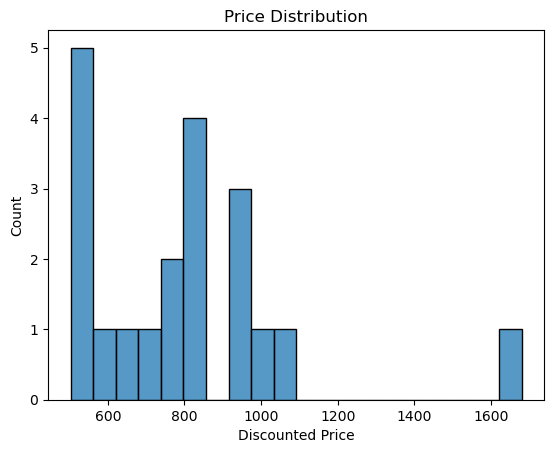

In [30]:
plt.figure()
sns.histplot(df["Discounted Price"],bins=20)
plt.title("Price Distribution")
plt.xlabel("Discounted Price(Rs.)")
plt.show()